In [25]:
#importing all the libraries 

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [85]:
#importing dataset

In [86]:
fake = pd.read_csv(r'C:\Users\devan\Desktop\dataSet\Fake.csv', delimiter = ',')
true = pd.read_csv(r'C:\Users\devan\Desktop\dataSet\True.csv', delimiter = ',')

In [87]:
#adding coulumns fake/true in the each file and merging both into one dataset

In [88]:
fake['truthValue']= 0
true['truthValue']= 1

dataset =pd.DataFrame()
dataset = true.append(fake)

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   truthValue  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [90]:
#droping the coulumn subject and date

(-0.5, 399.5, 199.5, -0.5)

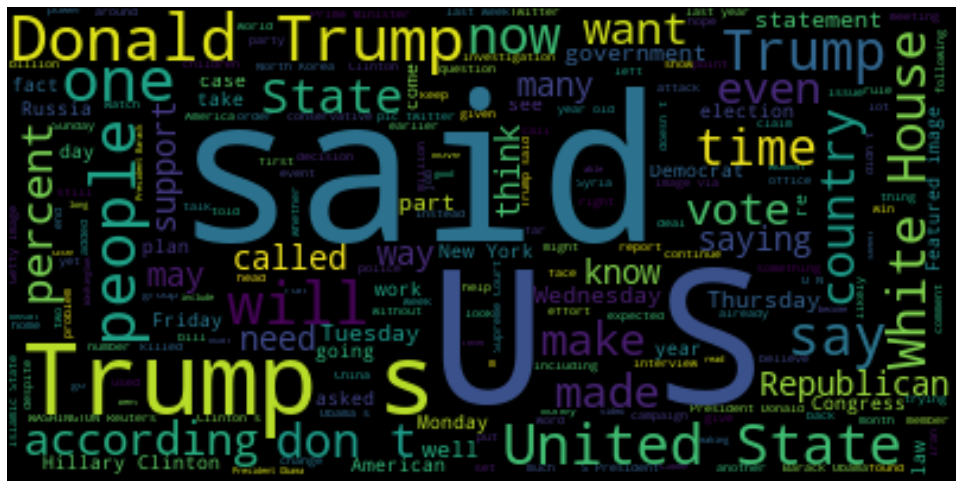

In [91]:
column = ['date','subject']
dataset = dataset.drop(columns=column)
input_array=np.array(dataset['title'])

from wordcloud import WordCloud
wordcloud1 = WordCloud().generate(' '.join(dataset['text']))

text=list(dataset['text'].dropna().unique())
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud().generate(" ".join(text))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')                                  

In [92]:
#Cleaning the data by removing stopwords and stemming and then forming a word corpus which can be used for 'bag of words' approach. 

In [93]:
import re
import nltk
# ltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 40000):
    preprocessingText = re.sub('[^a-zA-Z]', ' ', input_array[i])
    preprocessingText = preprocessingText.lower()
    preprocessingText = preprocessingText.split()
    ps = PorterStemmer()
    preprocessingText = [ps.stem(word) for word in preprocessingText if not word in set(stopwords.words('english'))]
    preprocessingText = ' '.join(preprocessingText)
    corpus.append(preprocessingText)

In [94]:
#using scikit-learn feature extraction liberary to create a frequency vector of words. the higher 'max_feature', better the result, but it;'ll 
#take too much computaional resource as well as time. 

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[0:40000, 2].values

In [96]:
#splitting the data set into training and test data set. 

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [101]:
#method to print plot confusion matrix 
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix: 
 [[3096  656]
 [ 280 3968]]

Accuracy of Gaussian Naive Bayes Predictions: 88.3 %
Confusion matrix, without normalization


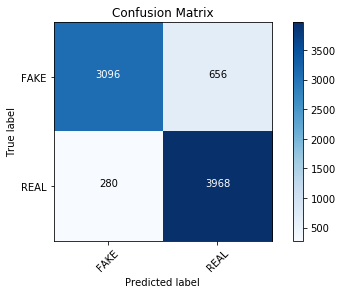

In [102]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predG = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predG)
from sklearn.metrics import accuracy_score
gNB=accuracy_score(y_test, y_predG)
print("Confusion Matrix: \n",cm)
print("\nAccuracy of Gaussian Naive Bayes Predictions:",(gNB)*100,"%" )
plot_confusion_matrix(cm,classes=['FAKE','REAL'])
# plt.plot(cm)
# plt.show()

Confusion Matrix: 
 [[3536  216]
 [ 317 3931]]

Accuracy of Multinomial Naive Bayes Predictions: 93.33749999999999 %
Confusion matrix, without normalization


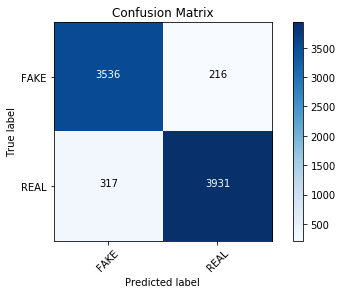

In [103]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier1 = MultinomialNB()
classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_predM = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predM)
from sklearn.metrics import accuracy_score
mNB= accuracy_score(y_test, y_predM)
print("Confusion Matrix: \n",cm1)
print("\nAccuracy of Multinomial Naive Bayes Predictions:",(mNB)*100,"%" )
plot_confusion_matrix(cm1,classes=['FAKE','REAL'])

In [ ]:
#Fitting Decision Tree to the training set
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_predD = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predD)
from sklearn.metrics import accuracy_score
dt=accuracy_score(y_test, y_predD)
print("Confusion Matrix: \n",cm2)
print("\nAccuracy of Decision Tree Predictions:",(dt)*100,"%" )
plot_confusion_matrix(cm2,classes=['FAKE','REAL'])

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes= fig.add_axes([0,0,1,1])
x_axes=['GaussianNB','MultinomialNB','DTree']
y_axes = [gNB,mNB,dt]
axes.bar(x_axes,y_axes)
plt.show()